

## Exploratory Data Analysis (EDA) 

---

This project is focused on exploratory data analysis, often referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. 
---

This project includes a variety of plotting problems. 


In [67]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. 
%config InlineBackend.figure_format = 'retina'


## 1. Load the `sat_scores.csv` dataset and describe it

---

I will replace the placeholder path to the `sat_scores.csv` dataset below with the specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [68]:
sat_filepath = 'sat_scores.csv'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [69]:
sat_scores = pd.read_csv(sat_filepath)

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

In [70]:

sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501




## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes the data. This should contain the name of each variable (column), the type of the variable, the description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [71]:
sat_scores.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

In [72]:
sat_scores.shape

(52, 4)



## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`


[See the `distplot` documentation to learn about the arguments and fine-tune the chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

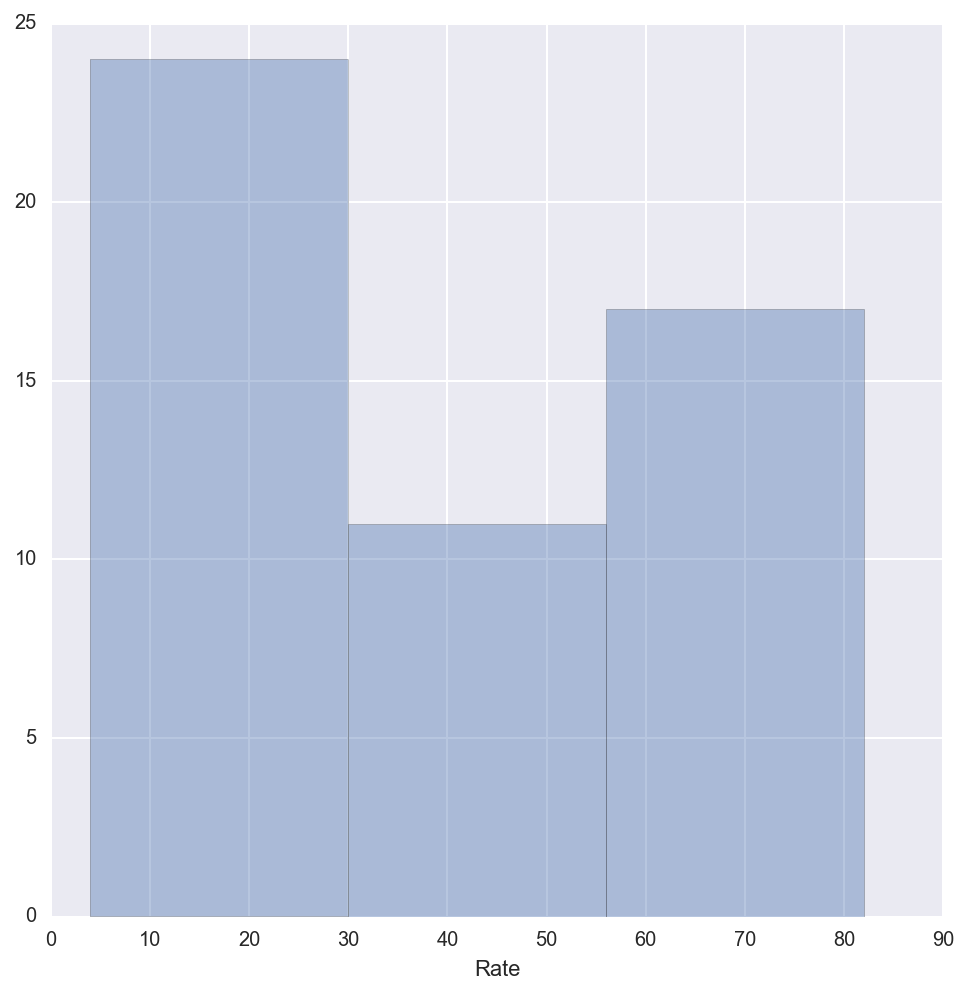

In [81]:
sns.set(rc={"figure.figsize": (8, 8)})
sns.distplot(sat_scores['Rate'], kde=False)

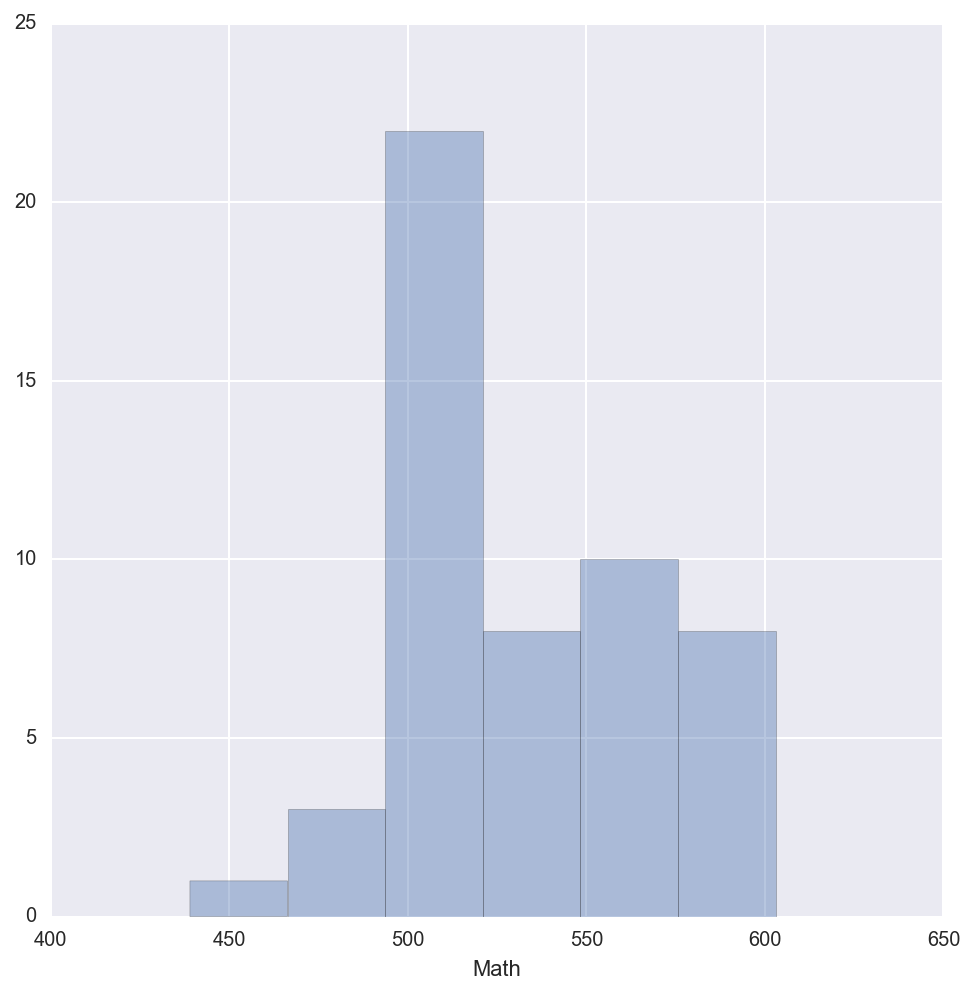

In [74]:
sns.set(rc={"figure.figsize": (8, 8)})
sns.distplot(sat_scores['Math'], kde=False)

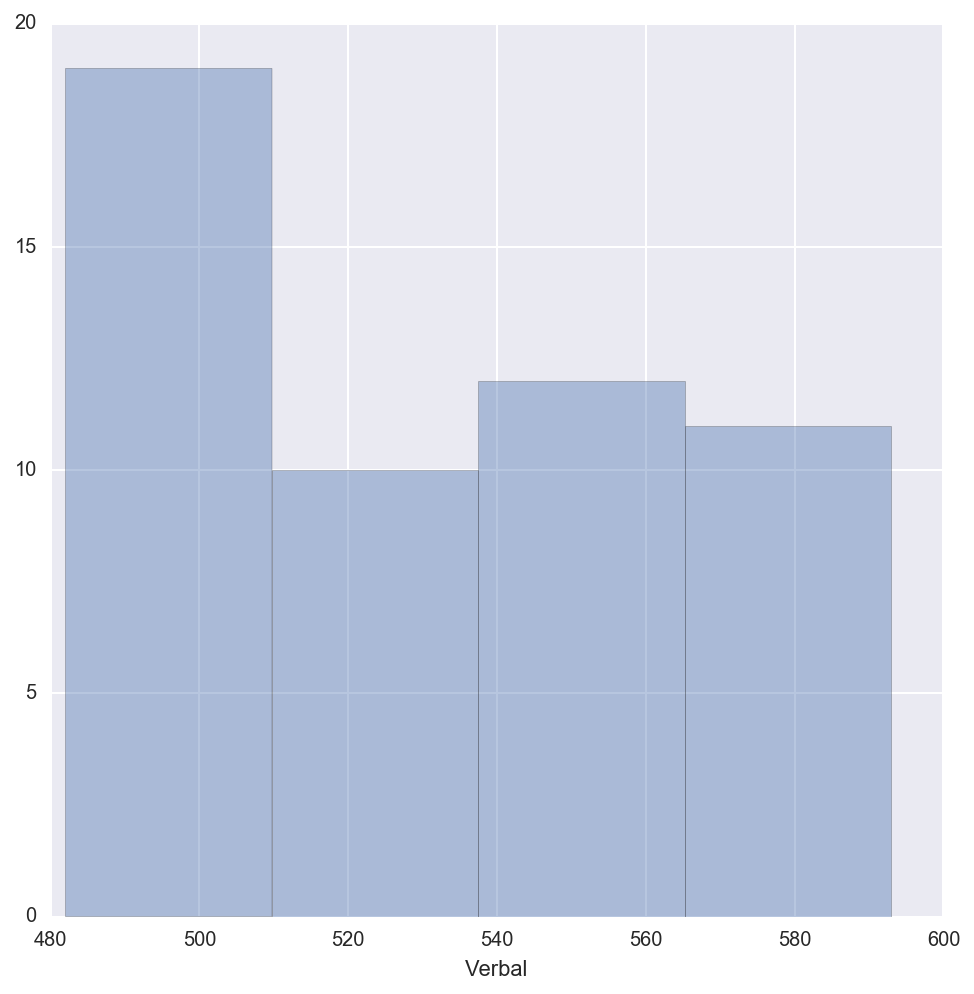

In [82]:
sns.set(rc={"figure.figsize": (8, 8)})
sns.distplot(sat_scores['Verbal'], kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

[See the  `pairplot` documentation to fine-tune the chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

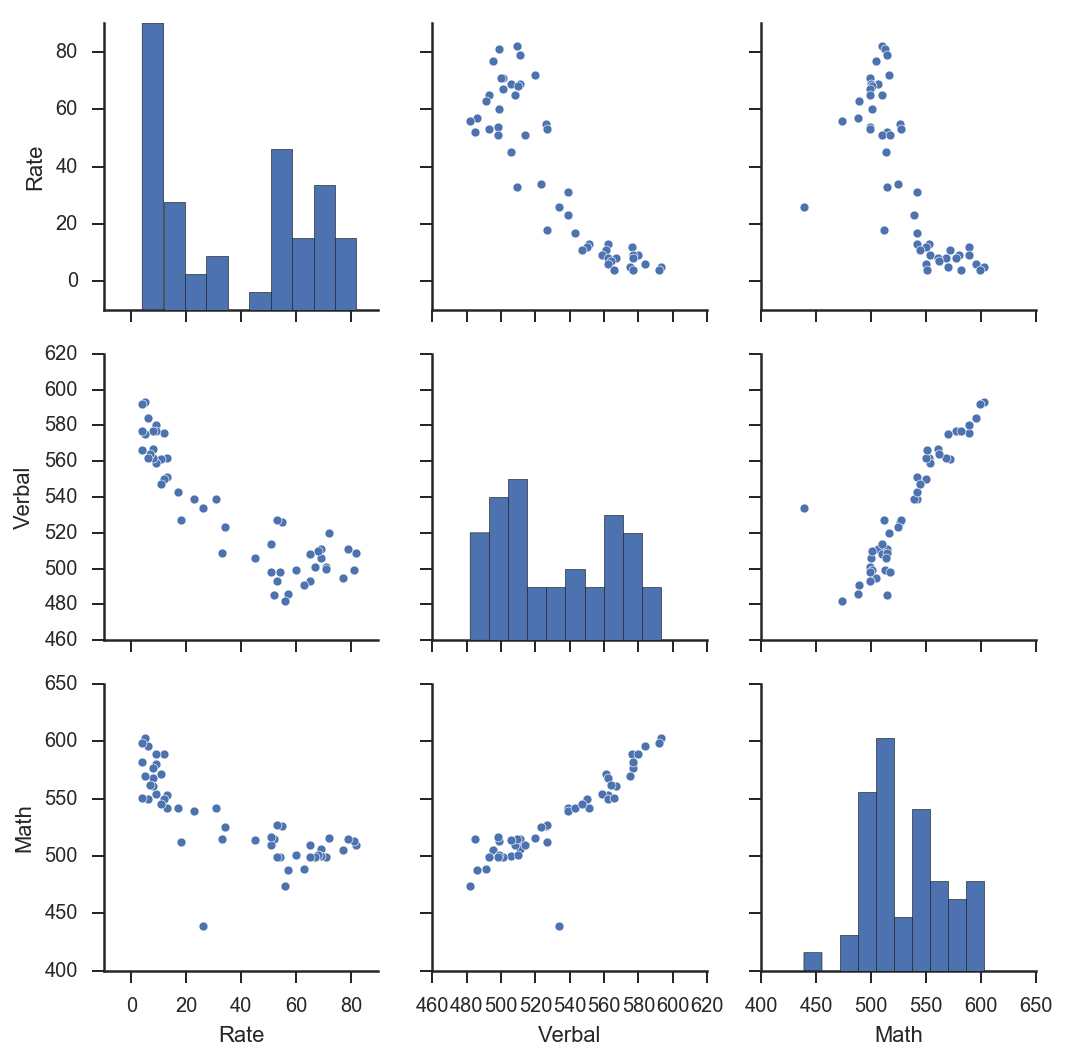

In [83]:
#sns.set(rc={"figure.figsize": (8, 8)})
#sns.pairplot (sat_scores['Rate'], kde=False)

sns.set(style="ticks", color_codes=True)
sns.pairplot(sat_scores)



## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for the data. See the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

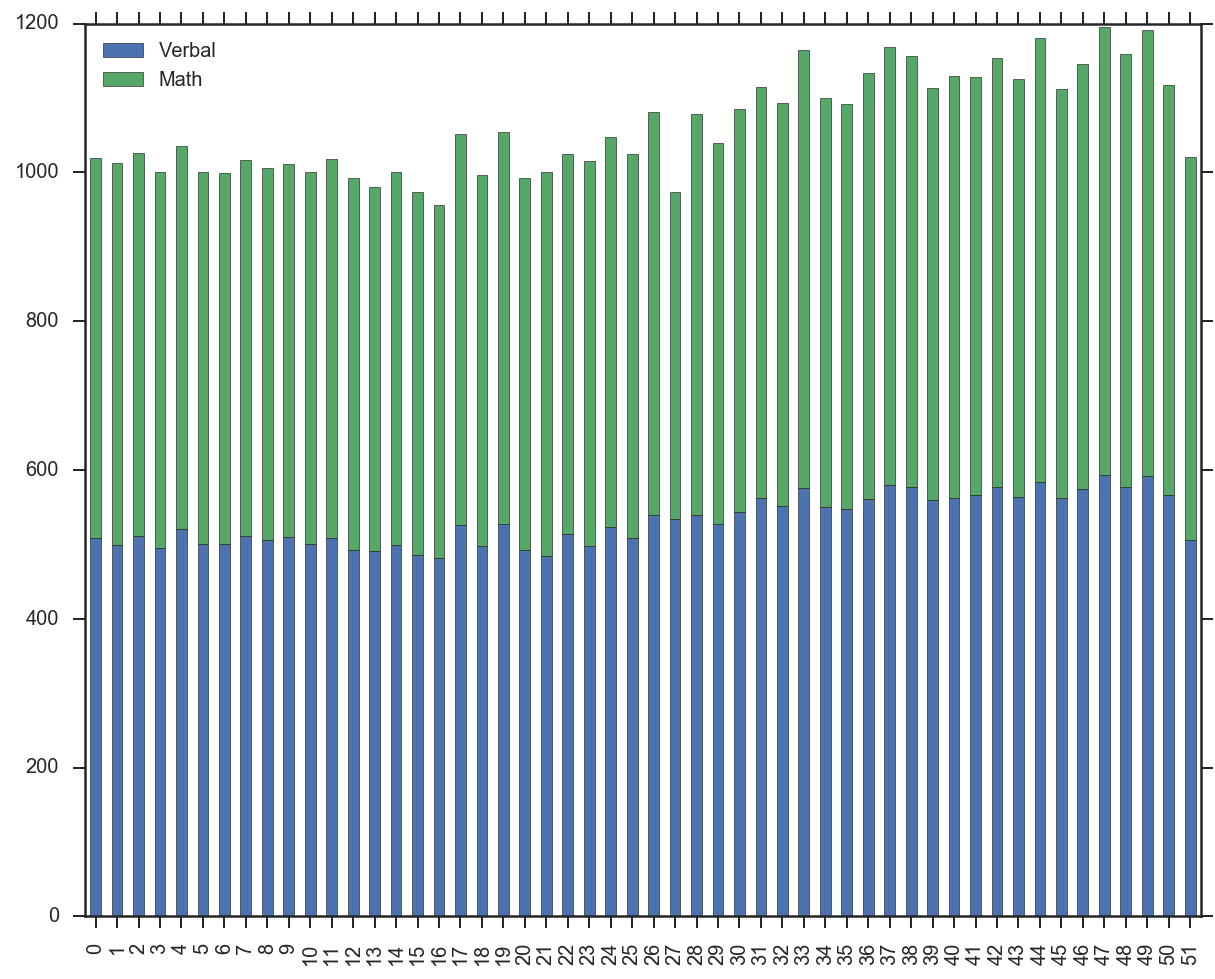

In [84]:

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)
sat_scores[['Verbal','Math']].plot(kind="bar", stacked=True, ax=ax)

plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


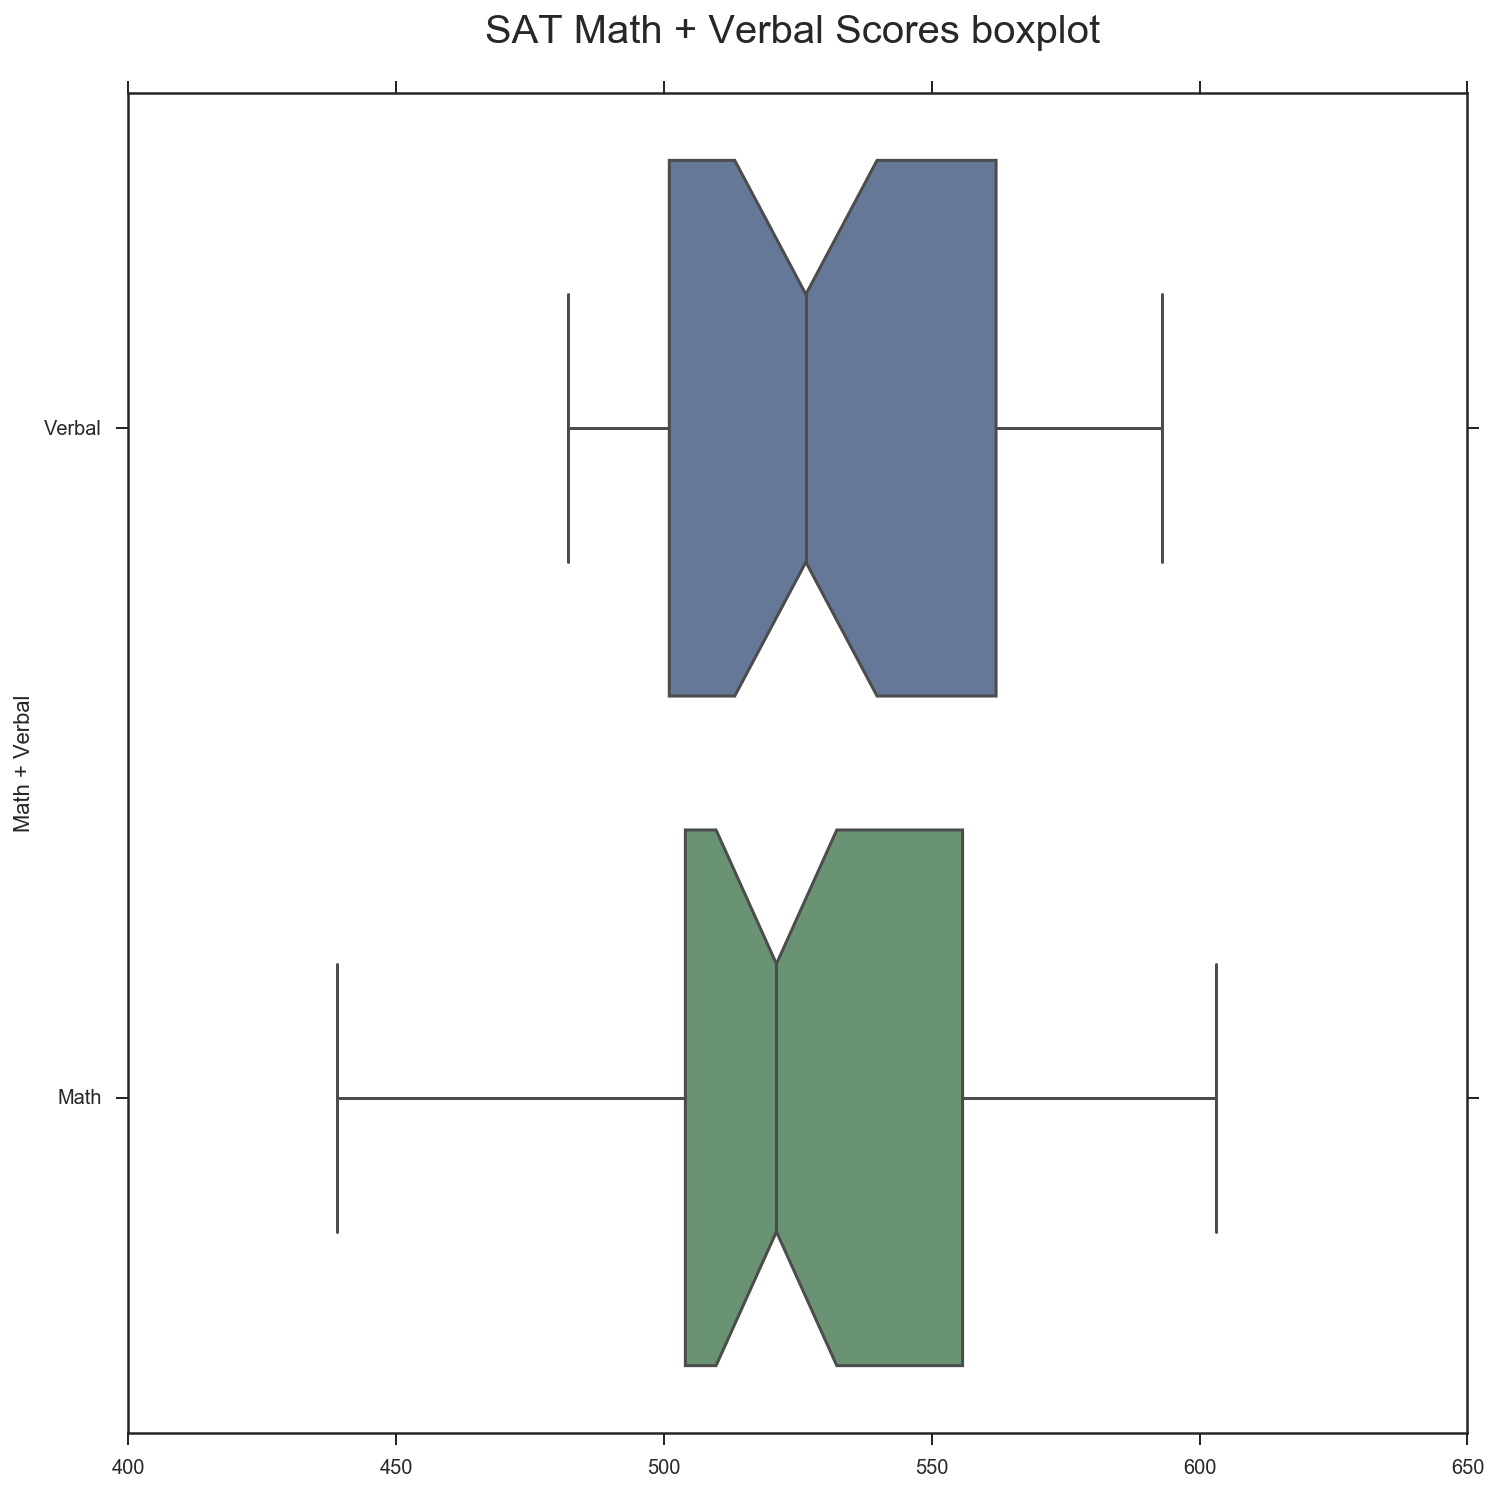

In [85]:
fig  = plt.figure(figsize=(12,12))
ax = fig.gca()

ax = sns.boxplot(sat_scores[['Verbal','Math']],
                 orient = 'h',
                 fliersize = 8, 
                 linewidth = 1.5, 
                 notch = True,
                 saturation = 0.5, 
                 ax = ax)
ax.set_ylabel('Math + Verbal')
ax.set_title('SAT Math + Verbal Scores boxplot \n', fontsize = 20)
plt.show()



### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

I will strive to make the chart as intuitive as possible. 


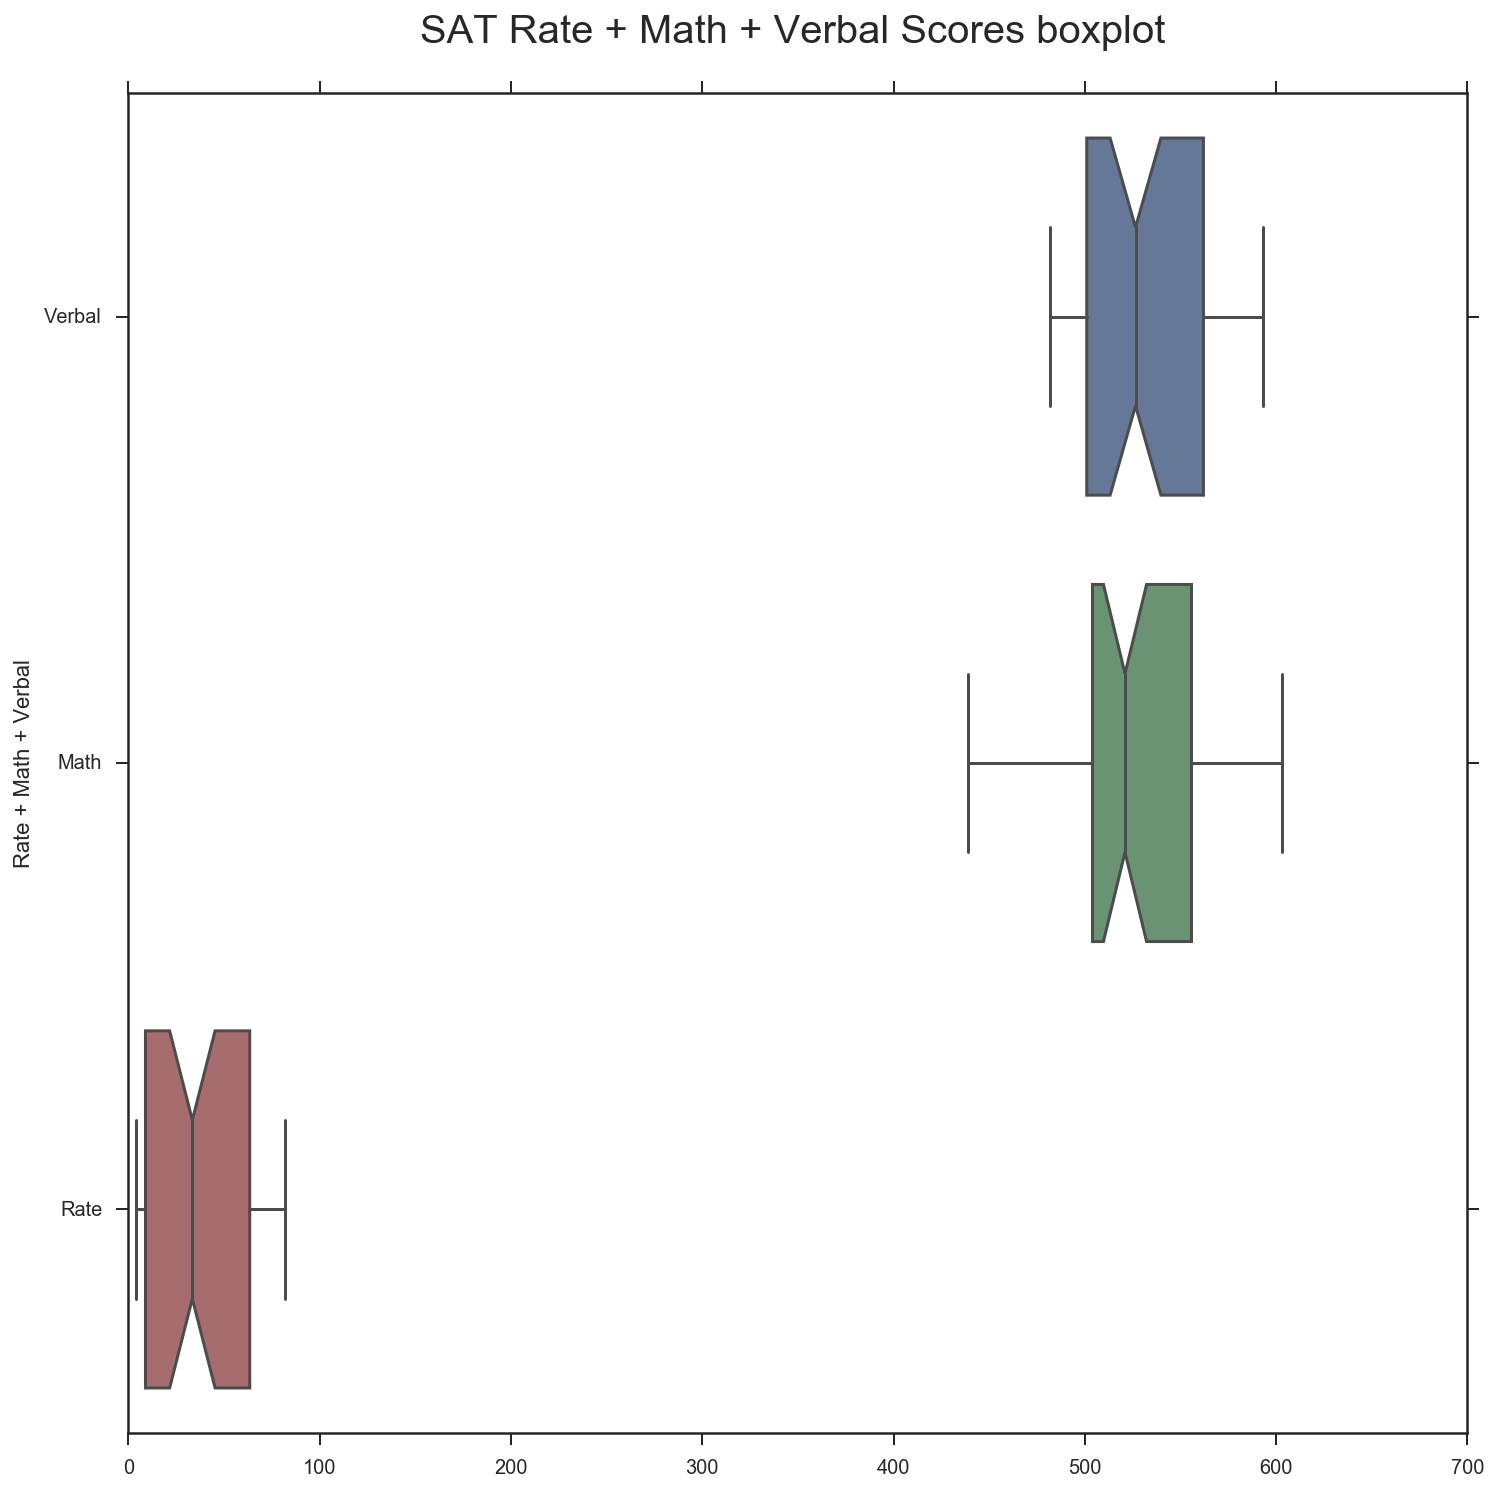

In [86]:

fig  = plt.figure(figsize=(12,12))
ax = fig.gca()

ax = sns.boxplot(sat_scores[['Verbal','Math','Rate']],
                 orient = 'h',
                 fliersize = 8, 
                 linewidth = 1.5, 
                 notch = True,
                 saturation = 0.5, 
                 ax = ax)
ax.set_ylabel('Rate + Math + Verbal')
ax.set_title('SAT Rate + Math + Verbal Scores boxplot \n', fontsize = 20)
plt.show()



## 5. Create and examine subsets of the data

---

Here I will be **masking** in pandas. Recall that masking uses conditional statements to select portions of the DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean?




In [87]:
verbal_mask = (sat_scores['Verbal'] > np.mean(sat_scores['Verbal']))
sat_red = sat_scores[verbal_mask] 

sat_red['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [88]:
verbal_mask1 = (sat_scores['Verbal'] > np.median(sat_scores['Verbal']))
sat_red1 = sat_scores[verbal_mask1] 
sat_red1['State']

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [89]:
verbal_math  = sat_scores['Verbal'] - sat_scores['Math']
verbal_math

0     -1
1    -14
2     -4
3    -10
4      4
5      2
6      1
7      5
8      6
9      9
10     2
11    -2
12    -6
13     2
14    -2
15    -2
16     8
17     0
18    -1
19     0
20    -6
21   -30
22     4
23   -19
24    -2
25    -6
26    -3
27    95
28     0
29    15
30     1
31     9
32     9
33   -13
34     0
35     2
36   -11
37    -9
38    -3
39     5
40    -6
41     6
42     0
43     2
44   -12
45    12
46     5
47   -10
48    -5
49    -7
50    15
51    -8
dtype: int64

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. The first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. The second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [99]:
mask1 = ( sat_scores['Verbal'] - sat_scores['Math'] ) > 0
sat_scores[mask1].head(3)

,State,Rate,Verbal,Math
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499


In [100]:
mask2 = ( sat_scores['Math'] - sat_scores['Verbal'] ) > 0
sat_scores[mask2].head(3)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515




## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of the variables (excluding `State`).

What does the correlation matrix tell us?


In [101]:
sat_scores[['Verbal','Math','Rate']].corr()


,Verbal,Math,Rate
Verbal,1.000000,0.899871,-0.886432
Math,0.899871,1.000000,-0.773746
Rate,-0.886432,-0.773746,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on the DataFrame

Write up what each of the rows returned by the function indicate.

In [102]:
sat_scores.describe()


,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000




### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in the data?

In [105]:
# We put our result in a data frame  so we can look at it, and maybe use it further

sat_scores_cov = pd.DataFrame(np.cov(sat_scores[['Rate', 'Verbal','Math']],sat_scores[['Rate', 'Verbal','Math']], 
                                     bias=True))

print "Here is the covariance matrix for the SAT data"
sat_scores_cov.head(11)

Here is the covariance matrix for the SAT data


,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,40612.666667,40377.333333,41230.666667,40186.666667,42369.333333,40754.666667,40707.333333,41751.666667,41229.000000,41561.000000,...,54055.000000,52819.666667,55482.000000,52248.000000,53911.666667,56336.666667,54673.333333,56193.666667,52675.000000,44176.333333
1,40377.333333,40171.555556,40998.222222,39973.333333,42112.888889,40512.000000,40467.111111,41496.666667,40974.888889,41298.444444,...,53738.888889,52506.444444,55183.555556,51916.444444,53585.555556,56028.888889,54364.444444,55880.222222,52334.444444,43935.333333
2,41230.666667,40998.222222,41859.555556,40802.666667,43011.555556,41373.333333,41325.777778,42384.000000,41852.888889,42188.444444,...,54876.888889,53621.777778,56331.555556,53036.444444,54728.888889,57198.222222,55507.111111,57051.555556,53468.444444,44852.000000
3,40186.666667,39973.333333,40802.666667,39778.666667,41917.333333,40322.666667,40277.333333,41304.666667,40786.000000,41110.000000,...,53486.000000,52260.666667,54916.000000,51680.000000,53336.666667,55758.666667,54105.333333,55612.666667,52098.000000,43723.333333
4,42369.333333,42112.888889,43011.555556,41917.333333,44206.222222,42520.000000,42469.777778,43562.666667,43018.222222,43367.111111,...,56394.222222,55107.111111,57872.888889,54519.111111,56248.888889,58766.222222,57035.111111,58619.555556,54967.111111,46081.333333
5,40754.666667,40512.000000,41373.333333,40322.666667,42520.000000,40898.666667,40850.666667,41900.666667,41376.666667,41711.333333,...,54244.666667,53006.000000,55670.666667,52437.333333,54103.333333,56529.333333,54862.666667,56387.333333,52867.333333,44327.333333
6,40707.333333,40467.111111,41325.777778,40277.333333,42469.777778,40850.666667,40802.888889,41851.000000,41327.444444,41661.222222,...,54181.444444,52943.888889,55607.777778,52374.222222,54039.444444,56465.111111,54799.555556,56322.777778,52803.222222,44277.000000
7,41751.666667,41496.666667,42384.000000,41304.666667,43562.666667,41900.666667,41851.000000,42928.666667,42392.333333,42736.666667,...,55572.333333,54304.333333,57027.333333,53726.666667,55430.000000,57908.000000,56203.000000,57764.000000,54168.666667,45408.333333
8,41229.000000,40974.888889,41852.888889,40786.000000,43018.222222,41376.666667,41327.444444,42392.333333,41862.888889,42203.444444,...,54876.888889,53625.111111,56311.555556,53056.444444,54737.222222,57181.555556,55498.777778,57039.888889,53493.444444,44838.666667
9,41561.000000,41298.444444,42188.444444,41110.000000,43367.111111,41711.333333,41661.222222,42736.666667,42203.444444,42548.222222,...,55319.444444,54058.555556,56759.777778,53490.222222,55181.111111,57637.777778,55943.888889,57496.444444,53932.222222,45196.333333


In [104]:
print "Here is the correlation matrix for sat_scores"
sat_scores.corr()

Here is the correlation matrix for sat_scores


,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000




## 7. Performing EDA on "drug use by age" data.

---

I will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [106]:
drug_data_filepath = 'drug-use-by-age.csv'
drug_data = pd.read_csv(drug_data_filepath)

### 7.2 I do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. 
 

In [107]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### 7.3 Create a testable hypothesis about this data


1. Write a specific question I would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will I report after testing/examining the hypothesis?
3. Use EDA techniques of the choice, numeric and/or visual, to look into the question.
4. Write up the report on what I have found regarding the hypothesis about the data I came up with.

In [108]:
print "Here is the correlation matrix for drug data"
drug_data.corr()

Here is the correlation matrix for drug data


,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.281797,0.007798,-0.295302,0.008743,...,-0.083587,-0.112076,-0.166039,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.877378,0.677614,0.463702,-0.346643,...,0.617523,-0.263721,0.589219,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.785050,0.546194,0.182184,-0.174622,...,0.280704,0.007087,0.251554,0.448543,-0.415026,0.291766,0.260304,0.425153,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,0.620670,0.711613,0.959353,-0.478286,...,0.966226,-0.506892,0.971733,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.892077,0.631789,0.528733,-0.380430,...,0.612254,-0.285292,0.609618,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,0.835727,0.899944,0.855668,-0.368402,...,0.906638,-0.273908,0.865626,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.461914,-0.159997
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,1.000000,0.750790,0.556222,-0.198968,...,0.652764,-0.203711,0.603003,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.438421,0.091676
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,0.750790,1.000000,0.683674,-0.302988,...,0.805868,-0.135961,0.775321,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.333649,-0.023708
hallucinogen-use,-0.295302,0.463702,0.182184,0.959353,0.528733,0.855668,0.556222,0.683674,1.000000,-0.427863,...,0.909333,-0.419961,0.916777,0.862900,-0.314281,0.940008,-0.319860,0.780071,0.518700,-0.312746
hallucinogen-frequency,0.008743,-0.346643,-0.174622,-0.478286,-0.380430,-0.368402,-0.198968,-0.302988,-0.427863,1.000000,...,-0.488187,0.547363,-0.442181,-0.458016,0.705734,-0.452345,-0.103980,-0.432520,-0.231773,0.533095


In [109]:
# Here we define a funciton which calculates the correlations greater than a 
# coeff_val. 

def auto_coefficients(df, coeff_val):
    
    sorted_coefs  =   list()
    coefs         =   df.corr()
    
    for row_index, row_values in enumerate(coefs.values):
        
        for col_index, col_value in enumerate(row_values):
            
            if coefs.columns[row_index] == coefs.columns[col_index]:
                continue
            if col_value > coeff_val:
                sorted_coefs.append((coefs.columns[row_index], coefs.columns[col_index], col_value))  

    return sorted(sorted_coefs, key=lambda values: values[2], reverse=True)

# We put it in a data frame for use by pandas
# Look now at positive correlations, say >0.9
df_drug_use_plus = pd.DataFrame(auto_coefficients(drug_data, 0.9))

print "Users of drug in colum 0 are likely to use drug in column 1\n"
print "Positive correlations \n", df_drug_use_plus.head(11)
# Look now at negative correlations, say > -0.9
df_drug_use_minus = pd.DataFrame(auto_coefficients(drug_data, -0.9))

print "\nUsers of drug in colum 0 are unlikely to use drug in column 1\n"
print "Negative correlations \n", df_drug_use_minus.tail(11)

Users of drug in colum 0 are likely to use drug in column 1

Positive correlations 
                    0                  1         2
0   pain-releiver-use      oxycontin-use  0.976445
1       oxycontin-use  pain-releiver-use  0.976445
2       marijuana-use      oxycontin-use  0.971733
3       oxycontin-use      marijuana-use  0.971733
4       marijuana-use      stimulant-use  0.968096
5       stimulant-use      marijuana-use  0.968096
6       marijuana-use  pain-releiver-use  0.966226
7   pain-releiver-use      marijuana-use  0.966226
8   pain-releiver-use      stimulant-use  0.961484
9       stimulant-use  pain-releiver-use  0.961484
10      marijuana-use   hallucinogen-use  0.959353

Users of drug in colum 0 are unlikely to use drug in column 1

Negative correlations 
                          0                       1         2
409            inhalant-use               crack-use -0.543499
410             alcohol-use  tranquilizer-frequency -0.550501
411  tranquilizer-frequency    



## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

In [110]:
sat_scores_cov = pd.DataFrame(np.cov(sat_scores[['Rate', 'Verbal','Math']],sat_scores[['Rate', 'Verbal','Math']], 
                                     bias=True))

print "Cov matrix for non-state vars\n", sat_scores_cov.head(11)

print "Corr matrix for sat_score\n", sat_scores[['Rate', 'Verbal', 'Math']].corr()

Cov matrix for non-state vars
             0             1             2             3             4    \
0   40612.666667  40377.333333  41230.666667  40186.666667  42369.333333   
1   40377.333333  40171.555556  40998.222222  39973.333333  42112.888889   
2   41230.666667  40998.222222  41859.555556  40802.666667  43011.555556   
3   40186.666667  39973.333333  40802.666667  39778.666667  41917.333333   
4   42369.333333  42112.888889  43011.555556  41917.333333  44206.222222   
5   40754.666667  40512.000000  41373.333333  40322.666667  42520.000000   
6   40707.333333  40467.111111  41325.777778  40277.333333  42469.777778   
7   41751.666667  41496.666667  42384.000000  41304.666667  43562.666667   
8   41229.000000  40974.888889  41852.888889  40786.000000  43018.222222   
9   41561.000000  41298.444444  42188.444444  41110.000000  43367.111111   
10  41134.666667  40889.777778  41759.111111  40698.666667  42916.444444   

             5             6             7             8 